#### Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. 
#### The company is tring to figure out the impact of moving the first gate  from level 30 to level 40 on player retention.

### descriptive analysis-> visulization for 3 metrics-> check outlier->remove outlier-> visulization again -> check sample ratio mismatch-> check nomality and homogeneity-> test -> interpret result 

### A/B test procedure 


#### 1. Objective of this A/B test: to decide wether moving the gate from level 30 to level 40 will affect players retention rate (both retention for 1 day and 7 days)

#### 1.5 Exploratory analysis

#### 2. Experiment Design
     Key metric: game rounds played and retention rate. 
     Decide minimum detectable effect(MDE)/Practical significance

     Unit of variant: 
     Control group: units belong to gate_30; Treatment group: units belong to gate_40

     Decide statistical power: 0.8; Significance level: 0.05
     Calculate sample size
     Decide how long to run the experiment

#### 3. Run parametric/non-parametric tests to detect the change and if the change is significant  

#### 4. Sanity/validity check

#### 5. Intepret the Result


In [ ]:
import pandas as pd
import numpy as np

In [1087]:
df = pd.read_csv('cookie_cats.csv', header = 0)

In [1088]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


## exploratory analysis

In [1089]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [1090]:
df = df.replace({'TRUE': 1, 'FALSE':0})

In [1091]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [1092]:
#check if there is any duplicated data
df.duplicated(subset = 'userid').sum() 

0

In [1093]:
df.groupby(["version","retention_1"]).agg({ "sum_gamerounds" : ["mean",'median','min','max','count']})

sum_gamerounds                         
                              mean median min    max  count
version retention_1                                        
gate_30 False            18.379591    6.0   0  49854  24666
        True             94.411700   48.0   0   2961  20034
gate_40 False            16.340402    6.0   0   1241  25370
        True             95.381182   49.0   0   2640  20119

In [1094]:
df.groupby(['version', 'retention_7']).agg({'sum_gamerounds': ["mean",'median','min','max','count']})

sum_gamerounds                         
                              mean median min    max  count
version retention_7                                        
gate_30 False            25.796508   11.0   0    981  36198
        True            165.962479  105.0   0  49854   8502
gate_40 False            25.856356   11.0   0   2640  37210
        True            165.649837  111.0   0   2294   8279

In [1095]:
# #drop the column thats not for anlaysis 
# df1= df.drop(['userid'], axis = 1, inplace =False)
# 90 percentile of sum_gamerounds is on 134, but the maximum number of sum_gamerounds is 49854, there should be some outliers
df[['sum_gamerounds']].describe([0.1,0.25,0.75,0.9,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
sum_gamerounds,90189.0,51.872457,195.050858,0.0,1.0,5.0,16.0,51.0,134.0,493.0,49854.0


In [1096]:
df[df['version']=='gate_30'][['sum_gamerounds']].describe([0.1,0.25,0.75,0.9,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
sum_gamerounds,44700.0,52.456264,256.716423,0.0,1.0,5.0,17.0,50.0,135.0,493.0,49854.0


In [1097]:
df[df['version']=='gate_40'][['sum_gamerounds']].describe([0.1,0.25,0.75,0.9,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
sum_gamerounds,45489.0,51.298776,103.294416,0.0,1.0,5.0,16.0,52.0,134.0,492.12,2640.0


In [1098]:
#check if the categorical variables have appropriate number of levels
df_cat = df[['version','retention_1','retention_7']]
df_cat.nunique()

version        2
retention_1    2
retention_7    2
dtype: int64

In [1099]:
#check the unique value for each categrical variable 
for i in df_cat:
    print(i, ':', df_cat[i].unique())


version : ['gate_30' 'gate_40']
retention_1 : [False  True]
retention_7 : [False  True]


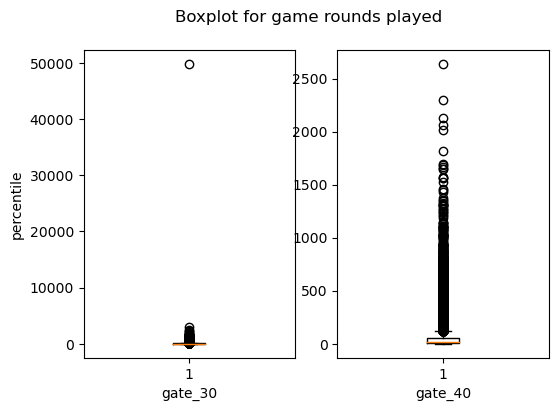

In [1100]:
#boxplot for sum_gamerounds
gate30game = df[df['version']=='gate_30'][['sum_gamerounds']]
gate40game = df[df['version']=='gate_40'][['sum_gamerounds']]

fig, ax = plt.subplots(1, 2, figsize = (6,4))

ax[0].boxplot(gate30game)
ax[0].set_xlabel('gate_30')
ax[0].set_ylabel('percentile')


ax[1].boxplot(gate40game)
ax[1].set_xlabel('gate_40')


fig.suptitle('Boxplot for game rounds played')
plt.show()

In [1101]:
#according to the boxplot and the descriptive analysis, get rid of the outliers which sum_gamerounds>493

df1 = df[df['sum_gamerounds']<=493]

In [1102]:
df1.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [1103]:
df1[['sum_gamerounds']].describe([0.1,0.25,0.75,0.9,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
sum_gamerounds,89291.0,44.528273,71.827905,0.0,1.0,5.0,16.0,49.0,124.0,366.0,493.0


In [1104]:
df1.groupby(['version','retention_1']).agg({'sum_gamerounds': ["mean",'median','min','max','count']})

sum_gamerounds                       
                              mean median min  max  count
version retention_1                                      
gate_30 False            15.992374    6.0   0  483  24653
        True             80.722106   46.0   0  493  19601
gate_40 False            16.047121    6.0   0  489  25360
        True             80.933323   48.0   0  493  19677

In [1105]:
df1.groupby(['version','retention_7']).agg({'sum_gamerounds': ["mean",'median','min','max','count']})

sum_gamerounds                       
                              mean median min  max  count
version retention_7                                      
gate_30 False            25.418537   11.0   0  490  36176
        True            130.843402   97.5   0  493   8078
gate_40 False            25.518472   11.0   0  491  37192
        True            133.893818  104.0   0  493   7845

In [1106]:
df1[df1['version']=='gate_30'][['sum_gamerounds']].describe([0.1,0.25,0.75,0.9,0.99], include=[np.number]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
sum_gamerounds,44254.0,44.662494,72.120593,0.0,1.0,5.0,16.0,48.0,125.0,369.47,493.0


In [1107]:
df1[df1['version']=='gate_40'][['sum_gamerounds']].describe([0.1,0.25,0.75,0.9,0.99], include=[np.number]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
sum_gamerounds,45037.0,44.396385,71.539695,0.0,1.0,5.0,16.0,50.0,124.0,362.64,493.0


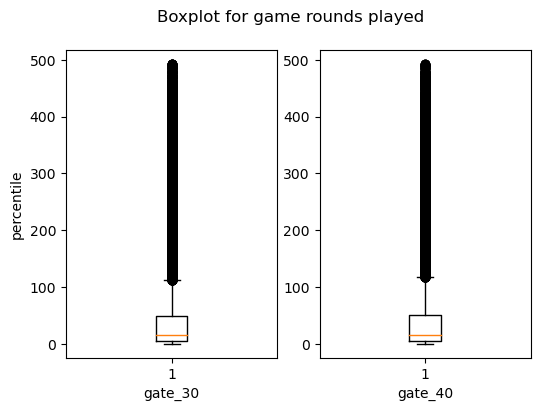

In [1108]:
#boxplot for sum_gamerounds after remove outliers
gate30game = df1[df1['version']=='gate_30'][['sum_gamerounds']]
gate40game = df1[df1['version']=='gate_40'][['sum_gamerounds']]

fig, ax = plt.subplots(1, 2, figsize = (6,4))

ax[0].boxplot(gate30game)
ax[0].set_xlabel('gate_30')
ax[0].set_ylabel('percentile')


ax[1].boxplot(gate40game)
ax[1].set_xlabel('gate_40')


fig.suptitle('Boxplot for game rounds played')
plt.show()

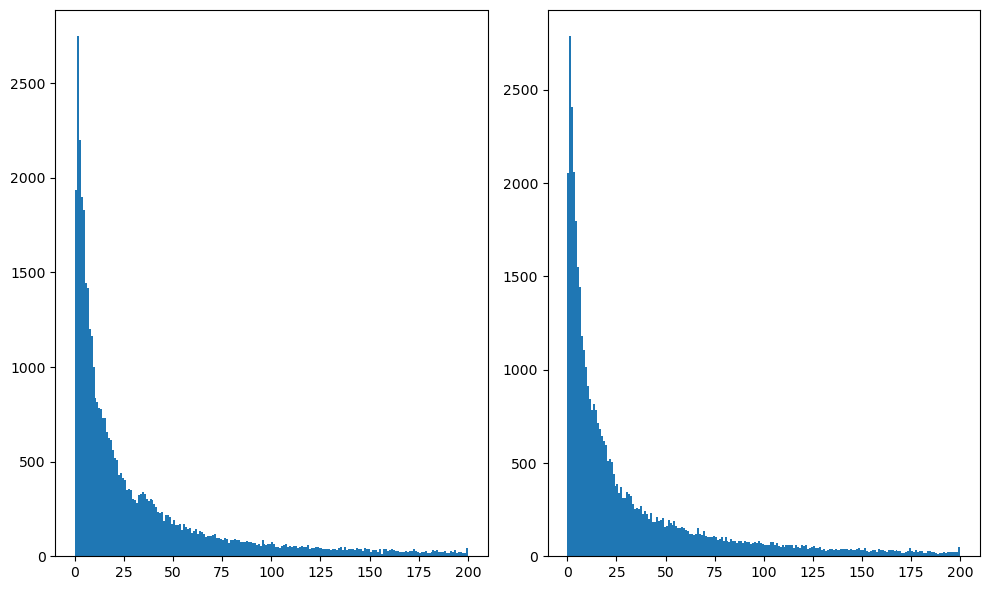

In [1120]:
#histogram for sum_gamerounds 

fig, ax = plt.subplots(1,2, figsize = (10,6))

ax[0].hist(gate30game, range = [0,200], bins = 200)
ax[1].hist(gate40game,  range = [0,200], bins = 200)

plt.tight_layout()
plt.show()

In [1121]:
#check the sample ratio misatch(SRM) to see if the data in control and treatment groups are imbalanced.
from scipy.stats import chisquare

def srm(control, treatment):
    real = [control, treatment]
    total_amount = sum(real)
    expected = [total_amount/2, total_amount/2]
    print(f'No. of players in control group(i.e. gate_30 group) is {control}')
    print(f'No. of players in control group(i.e. gate_40 group) is {treatment}')
    
    stats, pvalue = chisquare(real, expected)
    if pvalue <0.01:
        print('The sample ratio misatch exists')
    else:
        print("The sample ratio misatch doesn't exist")
    return stats, pvalue

In [1122]:
#for 1-day retention
gt_30 = df1[df1['version']=='gate_30'].count()[0]
gt_40 = df1[df1['version']=='gate_40'].count()[0]
# real = [gt_30, gt_40]
# total_amount = sum(real)
# expected = [total_amount/2, total_amount/2]

srm(gt_30, gt_40)
print(pvalue)

No. of players in control group(i.e. gate_30 group) is 44254
No. of players in control group(i.e. gate_40 group) is 45037
The sample ratio misatch exists
0.0424953577475377


In [1123]:
#since the srm exists, going to randomly sample 44k sample data from each group in the original dataset 
#to obtain a new dataset with balanced groups. 

gate_30_sample = df1[df1['version']=='gate_30'].sample(n = 44000, random_state = 123)
gate_40_sample = df1[df1['version']=='gate_40'].sample(n = 44000, random_state = 123)

srm(gate_30_sample.count()[0], gate_40_sample.count()[0])

No. of players in control group(i.e. gate_30 group) is 44000
No. of players in control group(i.e. gate_40 group) is 44000
The sample ratio misatch doesn't exist


(0.0, 1.0)

In [1124]:
# The new dataframe after resampling:
df1 = pd.concat([gate_30_sample, gate_40_sample], ignore_index = True)

In [1125]:
from matplotlib import pyplot as plt
import seaborn as sns

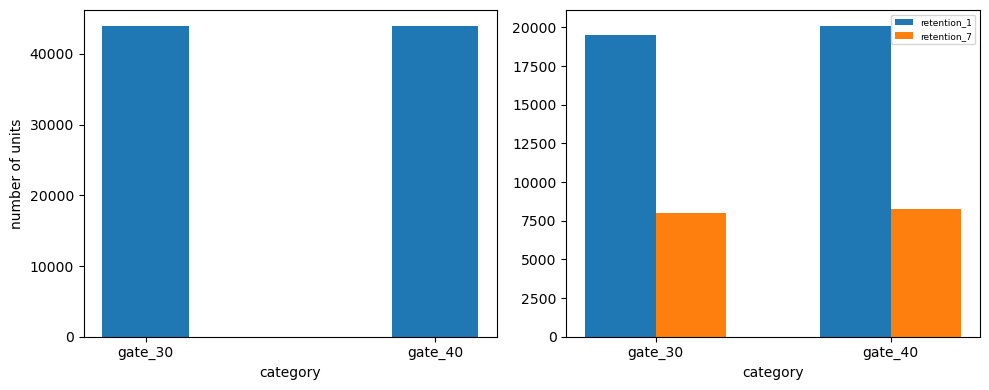

In [1126]:
bar = np.arange(len(counts1))
counts1 = [df1[df1['version']=='gate_30']['version'].count(),df1[df1['version']=='gate_40']['version'].count()]
xtick =  df1['version'].unique().tolist()       

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].bar(bar,counts1, width = 0.3)
ax[0].set_xlabel('category')
ax[0].set_ylabel('number of units')
ax[0].set_xticks([r for r  in bar], xtick)
                 
                 
retention1 = [sum(df1[df1['retention_1']==1]['version']=='gate_30'), sum(df[df['retention_1']==1]['version']=='gate_40')]
retention7 = [sum(df1[df1['retention_7']==1]['version']=='gate_30'), sum(df[df['retention_7']==1]['version']=='gate_40')]
xtick =  df1['version'].unique().tolist()  
barWidth = 0.3

bar1 = np.arange(len(retention1))
bar2 = [x+ barWidth for x in bar1]


ax[1].bar(bar1,retention1, width = barWidth, label = 'retention_1')
ax[1].bar(bar2,retention7, width = barWidth, label = 'retention_7')               
ax[1].set_xlabel('category')
# ax[1].set_ylabel('number of units')
# plt.xticks([r+barWidth/2 for r in range(len(retention1))],xtick)
ax[1].set_xticks([r + barWidth / 2 for r in range(len(retention1))])
ax[1].set_xticklabels(xtick)
ax[1].legend(loc ='upper right', borderpad =0.4, fontsize=6.5)


plt.tight_layout()
plt.show()


In [1127]:
rrate_1 = df1.groupby('version').agg({'retention_1':'sum'})/df1.groupby('version').agg({'retention_1':'count'})
rrate_1

,retention_1
version,
gate_30,0.443250
gate_40,0.436364


In [1128]:
rrate_7 = df1.groupby('version').agg({'retention_7':'sum'})/df1.groupby('version').agg({'retention_7':'count'})
rrate_7

,retention_7
version,
gate_30,0.182523
gate_40,0.174068


In [1129]:
#1-day retention and 7-day retention rates look similar for control and treatment group. 
#7-day retention rate drops around 26% comparing to 1-day retention rate for both groups. It would be worthy
#investigating the reason and come up with remedy solutions. 

print('percentage of 1-day retention for gate_30 version is %s'%(round(rrate_1['retention_1']['gate_30'],4)))
print('percentage of 1-day retention for gate_40 version is %s'%(round(rrate_1['retention_1']['gate_40'],4)))
print('percentage of 7-day retention for gate_30 version is %s'%(round(rrate_7['retention_7']['gate_30'],4)))
print('percentage of 7-day retention for gate_40 version is %s'%(round(rrate_7['retention_7']['gate_40'],4)))

percentage of 1-day retention for gate_30 version is 0.4432
percentage of 1-day retention for gate_40 version is 0.4364
percentage of 7-day retention for gate_30 version is 0.1825
percentage of 7-day retention for gate_40 version is 0.1741


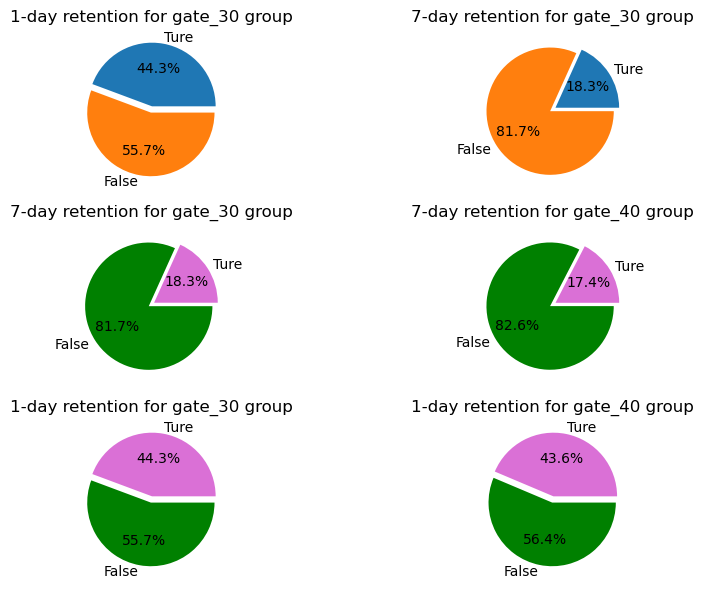

In [1130]:


r1_g30 = round(rrate_1['retention_1']['gate_30'],4)
r1_g40 = round(rrate_1['retention_1']['gate_40'],4)
r7_g30 = round(rrate_7['retention_7']['gate_30'],4)
r7_g40 = round(rrate_7['retention_7']['gate_40'],4)
label = ['Ture','False']
explode = (0.05, 0.05)

fig, ax = plt.subplots(3,2, figsize=(10, 6))
ax[0][0].pie([r1_g30, 1-r1_g30], labels = label, autopct='%1.1f%%',explode=explode)
ax[0][0].set_title('1-day retention for gate_30 group')
ax[0][1].pie([r7_g30, 1-r7_g30], labels = label, autopct='%1.1f%%',explode=explode)
ax[0][1].set_title('7-day retention for gate_30 group')

ax[1][0].pie([r7_g30, 1-r7_g30], labels = label, autopct='%1.1f%%',colors = ['orchid','green'],explode=explode)
ax[1][0].set_title('7-day retention for gate_30 group')
ax[1][1].pie([r7_g40, 1-r7_g40], labels = label, autopct='%1.1f%%', colors = ['orchid','green'],explode=explode)
ax[1][1].set_title('7-day retention for gate_40 group')

ax[2][0].pie([r1_g30, 1-r1_g30], labels = label, autopct = '%1.1f%%', colors = ['orchid','green'] , explode = explode)
ax[2][0].set_title('1-day retention for gate_30 group')
ax[2][1].pie([r1_g40, 1-r1_g40], labels = label, autopct = '%.1f%%', colors = ['orchid','green'], explode = explode)
ax[2][1].set_title('1-day retention for gate_40 group')

plt.tight_layout()
plt.show()

#####  insights: 
1. 7-day retention rate is around 26% lower than 1 day retention rate. The company should figure out some ways such as provide in game award to improve long term retention rate
2. The retention rate dropeed when moving the gate from level 30 to level 40 which is a counterintuitive phenomenon. This could be because the difficulties increase as level progresses and players can't clear the stage and thus abandon the game, or might due to the decrease of novelty after playing for a long time. Either way, the negative effect surpass the postive effect of postponing the gate from level 30 to level 40. We should consider to what extent can we attribute thec change of retention to the change of starting level of gate.

### A/B Testing

#### 1. Unit of variant: 
    Control group: units belong to gate_30; Treatment group: units belong to gate_40

#### 2. Decide statistical power: 0.8; Significance level: 0.05

#### 3. 3 questions to test:
    3.1. Is there significant difference of sum_gamerounds between countrol and treatment group
    3.2. Is there significant difference of 1-day retention rate between countrol and treatment group
    3.3. Is there significant difference of 7-day retention rate between countrol and treatment group

#### 4. Check nomality and homogeneity before deciding which test to use

In [1138]:
#Check nomality and homogeneity 
#for sum_gamerounds
from scipy.stats import shapiro, levene 
import warnings



def noramlity_test(x):
    stats,pvalue = shapiro(x)
    if pvalue<0.05:
        print('The distribution of this group is not normal')
        warnings.filterwarnings('ignore')
    else:
        print('The distribution of this group is normal')
        warnings.filterwarnings('ignore')
    
    return stats, pvalue

def homogeneity_test(x1, x2):
    stats, pvalue = levene(x1, x2)
    if pvalue<0.05:
        print('The samples are not from populations with equal variances')
        warnings.filterwarnings('ignore')
    else:
        print('The samples are from populations with equal variances')
        warnings.filterwarnings('ignore')
    return stats, pvalue

In [1139]:
group1 =df1[df1['version']=='gate_30'][['sum_gamerounds']] #gate_30 group, control group
group2 =df1[df1['version']== 'gate_40'][['sum_gamerounds']] #gate_40 group, treatment group


pvalue_control1 = noramlity_test(group1)[1]
print('%.4f' %pvalue_control1)
pvalue_treatment1 = noramlity_test(group2)[1]
print("%.4f" %pvalue_treatment1)

pvalue2 = homogeneity_test(group1['sum_gamerounds'], group2['sum_gamerounds'])[1]
print('%.4f' %pvalue2)


#based on the result, we could conclude that the distribution of the samples are not normal, 
#even though the two groups are homogeneous. So we should use non-parametric test--> mann whitney test

The distribution of this group is not normal
0.0000
The distribution of this group is not normal
0.0000
The samples are from populations with equal variances
0.9415


In [1133]:
#Is there significant difference of sum_gamerounds between countrol and treatment group
#Hypothesis:
#H0: mean_sum_gamerounds(gate_30) = mean_sum_gamerounds(gate_40)
#H1: mean_sum_gamerounds(gate_30) != mean_sum_gamerounds(gate_40)

#use mann whitney test



from scipy.stats import mannwhitneyu

def mann_whitney(x1,x2):
    stats, pvalue = mannwhitneyu(x1, x2)
    if pvalue <0.05:
        print('The game rounds played by two groups are different')
    else:
        print('The game rounds played by two groups are not different')
    return stats, pvalue

In [1134]:
# The difference between control group and treatment group is -0.266
df1.groupby('version')['sum_gamerounds'].mean().diff()[1]

-0.25225000000000364

In [1135]:
stats, pvalue = mann_whitney(group1['sum_gamerounds'],group2['sum_gamerounds'])
pvalue

The game rounds played by two groups are different


0.0424953577475377

#### 5. Conclusion
    The p-value for mann whitney test is smaller than 0.05, therefore we can reject the null hypothesis and 
    conclude that the difference of game rounds played between the control and treatment group is statistically 
    significantly different.
    However, since the difference is really small, less than 1 round and the p value is very close to 0.05, 
    futher research need to be done.

### A/B test
#### 3. 3 questions to test:
    3.2. Is there significant difference of 1-day retention rate between countrol and treatment group
    3.3. Is there significant difference of 7-day retention rate between countrol and treatment group
   

In [1064]:
#check if there is significant difference of retention between gate_30 group and gate_40 group

from scipy.stats import chi2_contingency

def check_retention(contingency_table, alpha):
    stats, pvalue, _, _ = chi2_contingency(contingency_table)
    if pvalue<alpha:
        print('The null hyphothesis is rejected, therefore there is significant difference of retention between gate_30 group and gate_40 group')
    
    else:
        print('There is no significant difference of retention between gate_30 group and gate_40 group')
    
    return print(f'p-value: {pvalue}')
    

In [1065]:
retention_1_contigency = pd.crosstab(df1['version'], df1['retention_1'])
retention_7_contigency = pd.crosstab(df1['version'], df1['retention_7'])

###### null hypothesis: there is no significant difference of 1-day retention between gate_30 group and gate_40 group
###### alternative hypothesis: there is significant difference of 1-day retention between gate_30 group and gate_40 group

In [1066]:
check_retention(retention_1_contigency, 0.05)

The null hyphothesis is rejected, therefore there is significant difference of retention between gate_30 group and gate_40 group
p-value: 0.04026691994298541


#### 5. Conclusion
The p-value from chisquare contingency test is smaller than 0.05, therefore we can reject the null hypothesis and conclude that the difference of 1-day retention rate between control and treatment groups is statistically significantly different.

###### null hypothesis: there is no significant difference of 7-day retention between gate_30 group and gate_40 group
###### alternative hypothesis: there is significant difference of 7-day retention between gate_30 group and gate_40 group

In [1067]:
check_retention(retention_7_contigency, 0.05)

The null hyphothesis is rejected, therefore there is significant difference of retention between gate_30 group and gate_40 group
p-value: 0.001085336027018581


#### 5. Conclusion
The p-value from chisquare contingency test is smaller than 0.05, therefore we can reject the null hypothesis and conclude that the difference of 7-day retention rate between control and treatment groups is statistically significantly different.

However, as I mentioned above, both the 1-day and 7-day retention rates dropped when moving the gate from level 30 to level 40 which is a counterintuitive phenomenon. This could be because the difficulties increase as level progresses and players can't clear the stage and thus abandon the game, or might due to the decrease of novelty after playing for a long time. Either way, the negative effect surpass the postive effect of postponing the gate from level 30 to level 40. We should consider to what extent can we attribute thec change of retention to the change of starting level of gate.